# Galerkin method of building difference scheme

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
h = 0.01
a = 0
b = 1

def u(x):
    return x + np.exp(x ** 2)

def K(x):
    return 1

def r(x):
    return -2 * x

def q(x):
    return 2

def F(x):
    return 4 * x

kappa_0 = 1
g_0 = 0
kappa_1 = 1
g_1 = 2 + 3 * np.exp(1)

In [107]:
def sweep_method(ax, bx, h, K, r, q, F, kappa_0, g_0, kappa_1, g_1):
    N = int((bx - ax) / h)
    x = [h * i for i in range(N + 1)]
    a = [0] * (N + 1)
    b = [0] * (N + 1)
    c = [0] * (N + 1)
    f = [0] * (N + 1)
    
    c[0] = (K(x[1] - h / 2) - h ** 2 / 6 * q(x[1] - h / 2) + r(x[0] + h / 2) / 2 * h) / h + kappa_0 + h / 2 * q(x[0] + h / 2)
    b[0] = (K(x[1] - h / 2) - h ** 2 / 6 * q(x[1] - h / 2) + r(x[0] + h / 2) / 2 * h) / h
    f[0] = g_0 + h / 2 * F(x[0] + h / 2)
    a[N] = (K(x[N] - h / 2) - h ** 2 / 6 * q(x[N] - h / 2) - r(x[N] - h / 2) / 2 * h) / h
    c[N] = (K(x[N] - h / 2) - h ** 2 / 6 * q(x[N] - h / 2) - r(x[N] - h / 2) / 2 * h) / h + kappa_1 + h / 2 * q(x[N] - h / 2)
    f[N] = g_1 + h / 2 * F(x[N] - h / 2)
    
    for i in range(1, N):
        a[i] = (K(x[i] - h / 2) - h ** 2 / 6 * q(x[i] - h / 2)) / h ** 2 - r(x[i] - h / 2) / 2 / h
        c[i] = (K(x[i] - h / 2) - h ** 2 / 6 * q(x[i] - h / 2) + K(x[i + 1] - h / 2) - h ** 2 / 6 * q(x[i + 1] - h / 2)) \
        / h ** 2 + r(x[i] + h / 2) / 2 / h - r(x[i] - h / 2) / 2 / h + (q(x[i] - h / 2) + q(x[i] - h / 2)) / 2
        b[i] = (K(x[i + 1] - h / 2) - h ** 2 / 6 * q(x[i + 1] - h / 2)) / h ** 2 + r(x[i] + h / 2) / 2 / h
        f[i] = (F(x[i] - h / 2) + F(x[i] + h / 2)) / 2
    
    alpha = [0] * (N + 1)
    beta = [0] * (N + 1)
    y = [0] * (N + 1) 
    alpha[1] = b[0] / c[0]
    beta[1] = f[0] / c[0]
    
    for i in range(1, N):
        alpha[i + 1] = b[i] / (c[i] - alpha[i] * a[i])
        beta[i + 1] = (f[i] + a[i] * beta[i]) / (c[i] - alpha[i] * a[i])
    
    y[N] = (f[N] + a[N] * beta[N]) / (c[N] - alpha[N] * a[N])
    for i in range(N - 1, -1, - 1):
        y[i] = alpha[i + 1] * y[i + 1] + beta[i + 1]
    
    return x, y

In [108]:
x, y = sweep_method(a, b, h, K, r, q, F, kappa_0, g_0, kappa_1, g_1)

In [109]:
u_values = [u(xi) for xi in x]
print(np.linalg.norm(np.subtract(u_values, y), np.inf))

3.670780167075449e-05


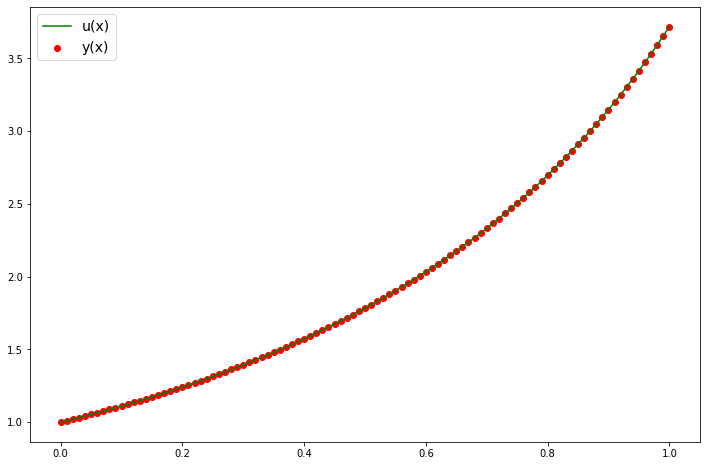

In [110]:
plt.figure(figsize=(12, 8))
plt.plot(x, u_values, c='g', label='u(x)')
plt.scatter(x, y, c='r', label='y(x)')
plt.legend(prop={'size': 14})
plt.show()